In [5]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
quandl.ApiConfig.api_key = "KsxPyvdx37U7pYk3xHBy"

df = quandl.get("WIKI/AMZN")
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


In [3]:
df = df[['Adj. Close']]
df.head()

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833


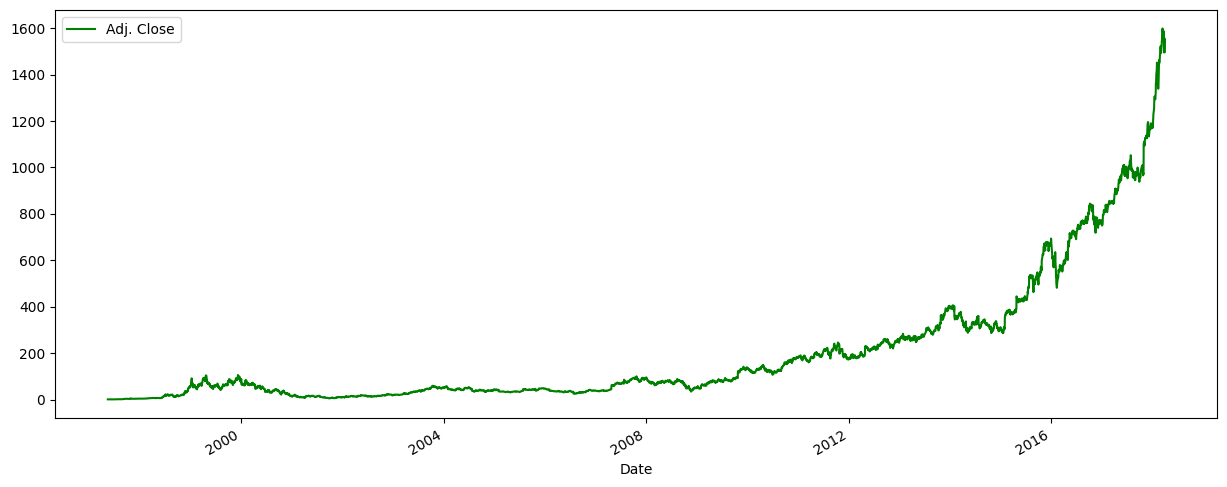

In [9]:
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc="upper left")
plt.show()

In [10]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)
df.head()

,Adj. Close,Prediction
Date,,
1997-05-16,1.729167,1.541667
1997-05-19,1.708333,1.515833
1997-05-20,1.635833,1.588333
1997-05-21,1.427500,1.911667
1997-05-22,1.395833,2.000000


In [18]:
X = np.array(df.drop(["Prediction"], 1))
X = preprocessing.scale(X) #standardizes data (mu = 0, sigma = 1)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df["Prediction"])
y = y[:-forecast]


C:\Users\Liamo Pennimpede\AppData\Local\Temp\ipykernel_23056\3490863617.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(["Prediction"], 1))


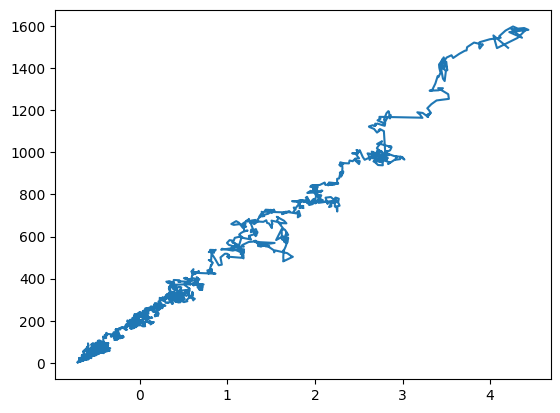

In [19]:
plt.plot(X,y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = LinearRegression() #estimator instance, classifier
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test) #check accuracy of model
confidence

0.98893499698982

In [22]:
forecast_predicted = clf.predict(X_forecast)
forecast_predicted #predicted values of last 30 days

array([1499.32643766, 1538.14808066, 1549.52683809, 1535.64071674,
       1556.52833309, 1572.00811794, 1573.96301184, 1590.15463306,
       1613.47524236, 1602.88269226, 1603.38204016, 1583.19563575,
       1590.42024365, 1615.23889664, 1630.14496263, 1637.96453823,
       1645.25289267, 1673.97070904, 1694.68833461, 1683.84079835,
       1686.83688574, 1677.61488626, 1666.31049979, 1637.89016727,
       1682.06651965, 1677.12616278, 1637.00834013, 1585.43738908,
       1649.50266202, 1587.02042817])

NameError: name 'datetime' is not defined

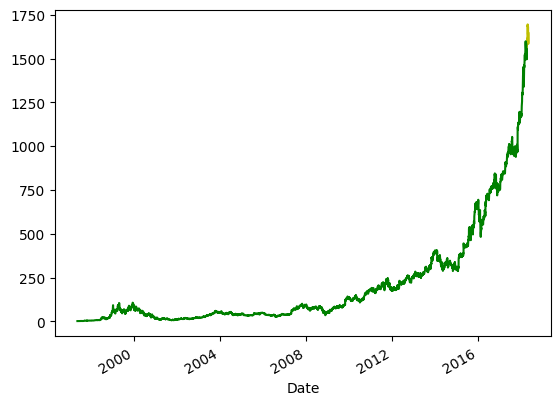

In [28]:
import datetime

dates = pd.date_range(start="2018-03-28", end="2018-04-26")

plt.plot(dates, forecast_predicted, color="y")
df["Adj. Close"].plot(color="g")

plt.xlim(xmin= datetime.date(2017,4,26))